In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_state_qsphere



### Full one-bit adder with sum and carry
https://quantumcomputing.stackexchange.com/questions/1654/how-do-i-add-11-using-a-quantum-computer

```
q_0 = first number
q_1 = second number
q_2 = sum bit
q_3 = carry bit
```

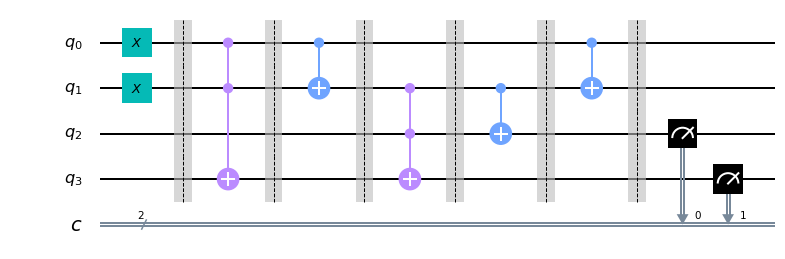

In [2]:
num1 = 1
num2 = 1
mycircuit = QuantumCircuit(4, 2)
if num1: mycircuit.x(0)
if num2: mycircuit.x(1)
mycircuit.snapshot('1', snapshot_type='statevector')
mycircuit.ccx(0,1,3)
mycircuit.snapshot('2', snapshot_type='statevector')
mycircuit.cx(0,1)
mycircuit.snapshot('3', snapshot_type='statevector')
mycircuit.ccx(1,2,3)
mycircuit.snapshot('4', snapshot_type='statevector')
mycircuit.cx(1,2)
mycircuit.snapshot('5', snapshot_type='statevector')
mycircuit.cx(0,1)
mycircuit.snapshot('6', snapshot_type='statevector')
mycircuit.measure([2,3], [0,1])

mycircuit.draw('mpl')

In [3]:
result = execute(mycircuit, Aer.get_backend('qasm_simulator')).result()
counts = result.get_counts(mycircuit)
print(counts)

{'10': 1024}


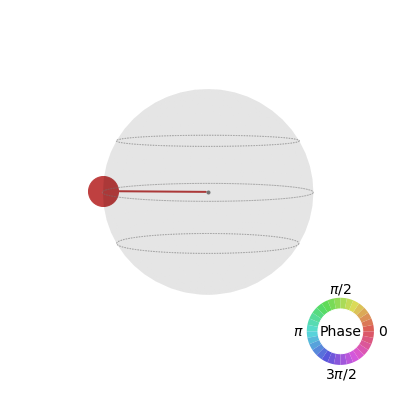

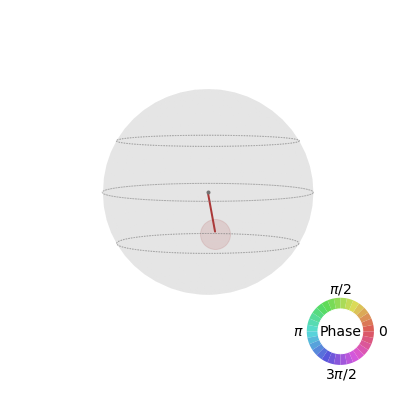

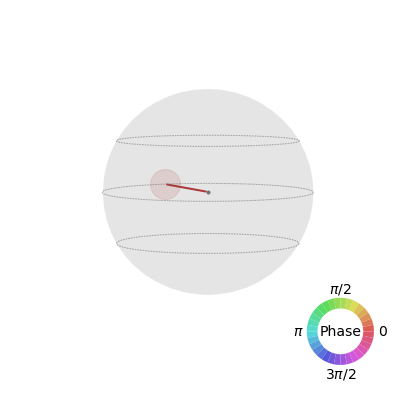

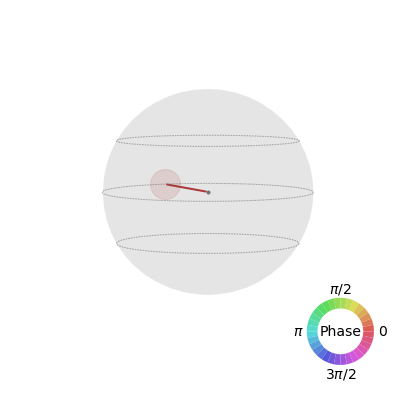

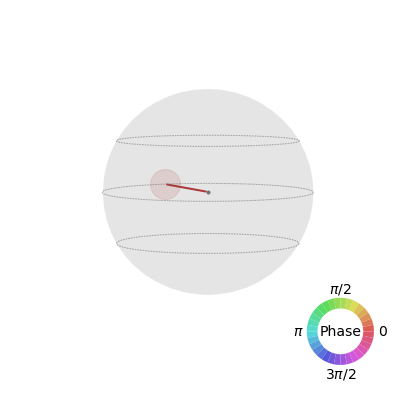

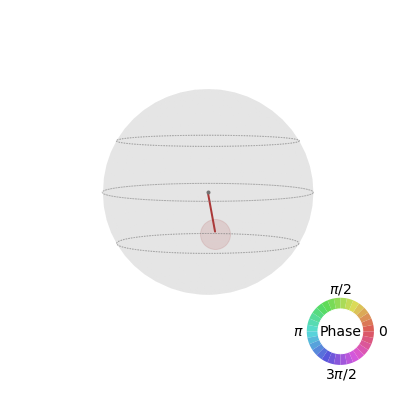

In [4]:
n_sv = len(result.data(0)['snapshots']['statevector'])

for sv_index in range(n_sv):
    this_sv = result.data(0)['snapshots']['statevector'][str(sv_index+1)][0]
    display(plot_state_qsphere(this_sv))

### Bernstein-Vazirani Algorithm

Hidden string = '1111'

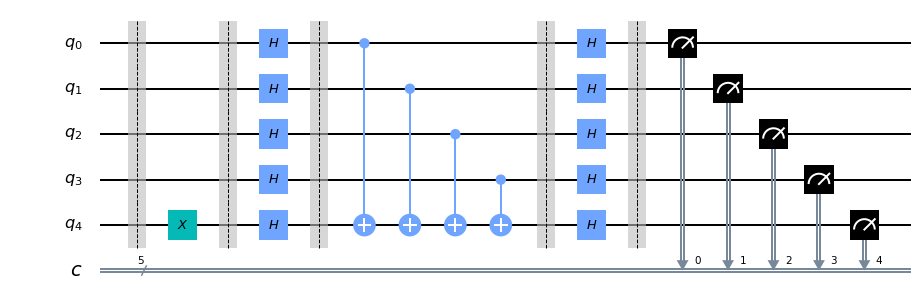

In [5]:
mycircuit = QuantumCircuit(5,5)
mycircuit.snapshot('1', snapshot_type='statevector')
mycircuit.x(4)
mycircuit.snapshot('2', snapshot_type='statevector')
mycircuit.h(range(5))
mycircuit.snapshot('3', snapshot_type='statevector')
mycircuit.cx(0,4)
mycircuit.cx(1,4)
mycircuit.cx(2,4)
mycircuit.cx(3,4)
mycircuit.snapshot('4', snapshot_type='statevector')
mycircuit.h(range(5))
mycircuit.snapshot('5', snapshot_type='statevector')
mycircuit.measure(range(5), range(5))

mycircuit.draw('mpl')

In [6]:
result = execute(mycircuit, Aer.get_backend('qasm_simulator')).result()
counts = result.get_counts(mycircuit)
print(counts)

{'11111': 1024}


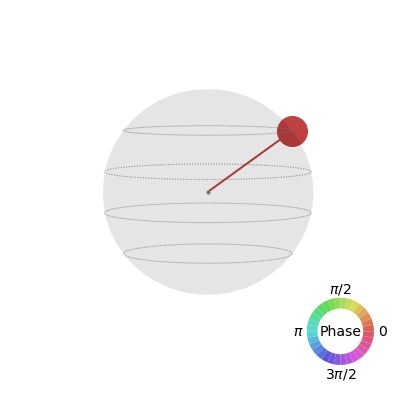

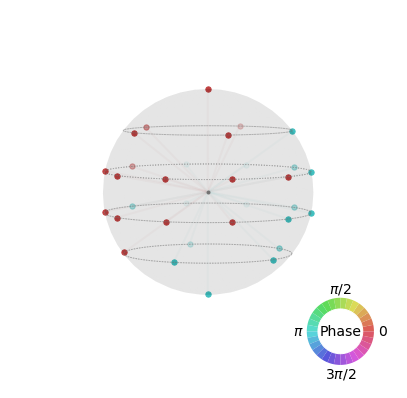

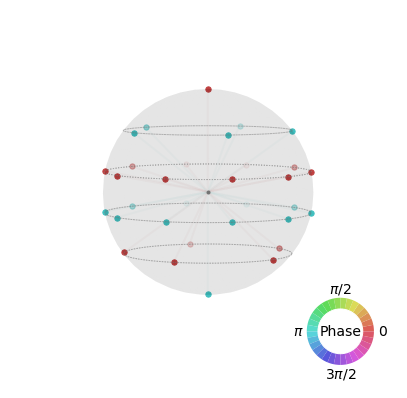

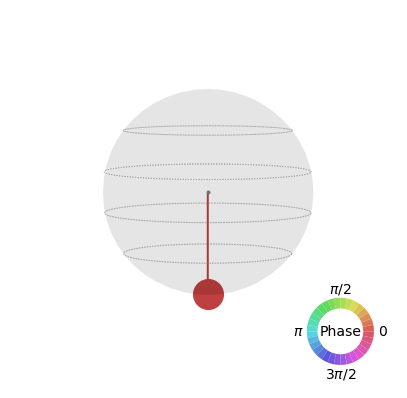

In [7]:
n_sv = len(result.data(0)['snapshots']['statevector'])

for sv_index in range(1,5):
    this_sv = result.data(0)['snapshots']['statevector'][str(sv_index+1)][0]
    display(plot_state_qsphere(this_sv))